## Author:- Abhishek Kumar

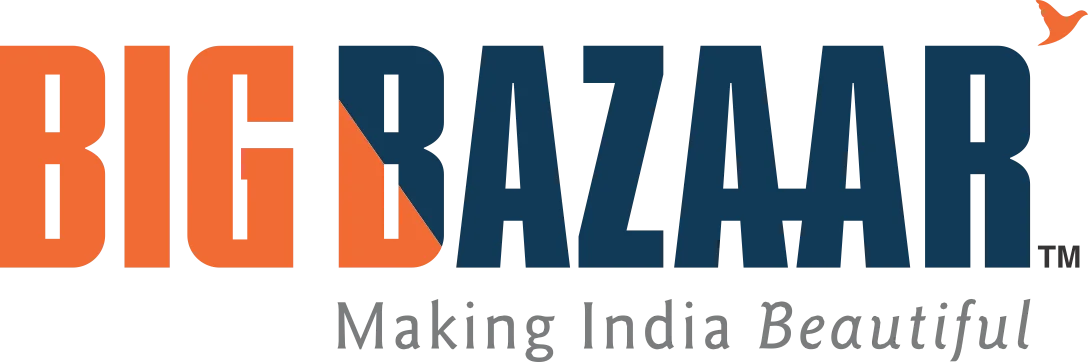

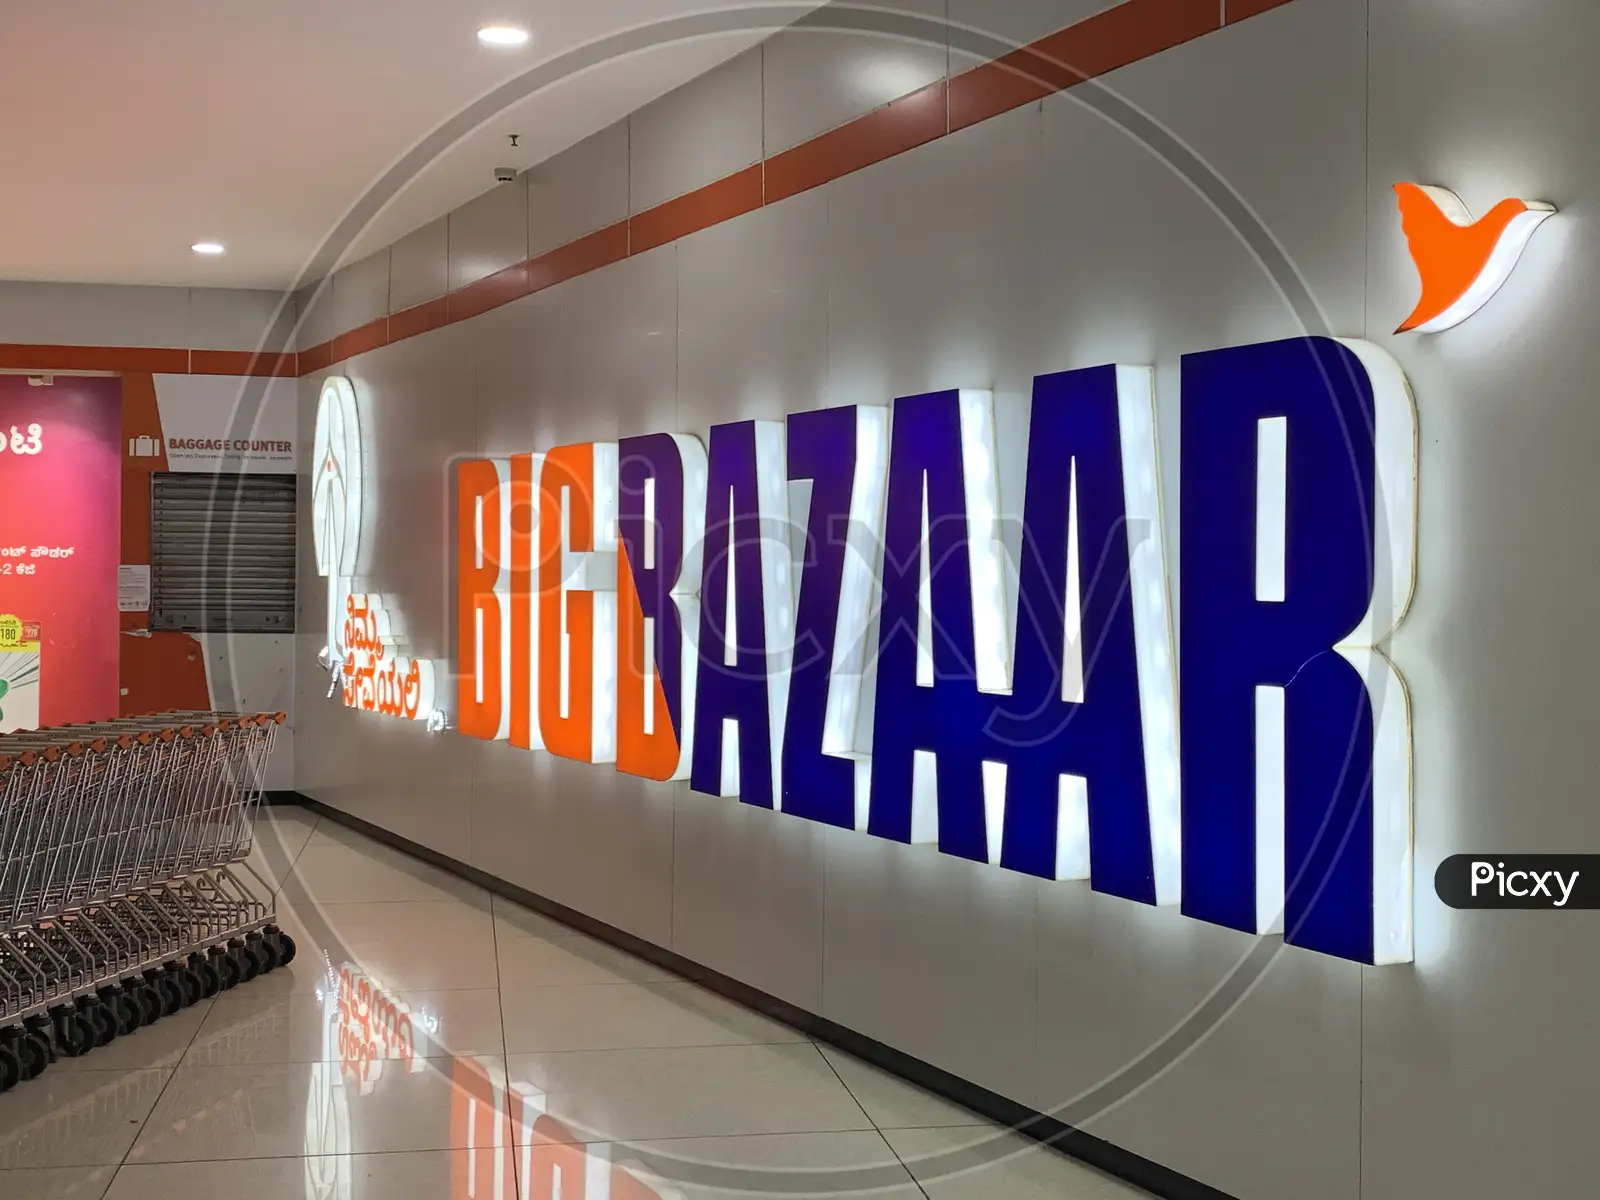

### Step 1:- Import all the Necessary Libarary:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Step 2:- Load the Csv file to the Dataset.

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Step 3:- Combine test and train into one file:---

In [4]:
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


### Step 4:- Read the 5 dataset using pandas head.

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
#Numerical data summary:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## ****Data Cleaning:---****

In [7]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Filling missing values

In [8]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [9]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [10]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [11]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [12]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [15]:
data.info

<bound method DataFrame.info of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092     

In [17]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [18]:
data.size

184652

In [20]:
data.items

<bound method DataFrame.items of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.000000   
4               NCD19         8.93          Low Fat         0.000000   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.000000   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092    

In [22]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1321.864430
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,1468.089000
50%,12.792854,0.054021,142.247000,1999.000000,2181.288914
75%,16.000000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2181.288914,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2181.288914,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,2181.288914,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,2181.288914,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,Medium,Tier 2,Supermarket Type1,2181.288914,test


In [25]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [26]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

### Numerical and One-Hot Coding of Categorical variables

In [27]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [28]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,False,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,False,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,False,...,False,True,False,False,False,False,False,False,False,False


In [30]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Item_Fat_Content_2              bool
Item_Fat_Content_3              bool
Item_Fat_Content_4              bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Size_0                   bool
Outlet_Size_1                   bool
Outlet_Size_2                   bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
Item_Type_Combined_0            bool
Item_Type_Combined_1            bool
Item_Type_Combined_2            bool
O

### Exporting Data

In [31]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Model Building

In [32]:
# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [33]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [34]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [35]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [36]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,5.92,0.019278,48.2692,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.50,0.016760,141.6180,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,19.20,0.000000,182.0950,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [37]:
X_train.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300000,0.016047,249.8092,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,5.920000,0.019278,48.2692,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,17.500000,0.016760,141.6180,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,19.200000,0.000000,182.0950,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8.930000,0.000000,53.8614,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,10.395000,0.000000,51.4008,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,13.650000,0.012741,57.6588,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,12.792854,0.127470,107.7622,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8,16.200000,0.016687,96.9726,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
9,19.200000,0.094450,187.8214,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [40]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [43]:
y_train.head(10)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
5     556.6088
6     343.5528
7    4022.7636
8    1076.5986
9    4710.5350
Name: Item_Outlet_Sales, dtype: float64

## Linear Regression Model:

In [44]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [46]:
y_pred

array([1848.53604783, 1472.81670435, 1875.65285894, ..., 1809.18796433,
       3565.6645235 , 1267.46171871])

In [47]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation, metrics


ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\abhi\anaconda3\Lib\site-packages\sklearn\__init__.py)

In [30]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.36

In [31]:
r2_score(y_train, regressor.predict(X_train))

0.563589277727048

In [32]:
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')


In [33]:
print(np.sqrt(np.abs(cv_score)))

[1150.93927648 1118.68414103 1112.89657923 1126.30724065 1140.59735737]


In [34]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1127


In [35]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [36]:
submission.to_csv('submission1.csv',index=False)

## Decision Tree Model:

In [37]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=300,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [39]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.59

In [40]:
r2_score(y_train, regressor.predict(X_train))

0.5884050821570486

In [41]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1138.77137157 1109.42501179 1145.66395939 1113.2648073  1129.0816826 ]


In [42]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1095


In [43]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [44]:
submission.to_csv('submission2.csv',index=False)

## Random Forest Model:

In [45]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1643.87106725, 1364.24193091,  603.09113992, ..., 1957.62183676,
       3698.60040819, 1290.25320329])

In [47]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [48]:
r2_score(y_train, regressor.predict(X_train))

0.6125814698282157

In [49]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1100.46298396 1077.70836131 1077.65325884 1069.0502564  1083.85364282]


In [50]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1062


In [51]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [52]:
submission.to_csv('submission3.csv',index=False)

In [49]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,train,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,train,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [52]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [54]:
train2.tail()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
8522,DRG01,14.800,0.044878,75.4670,OUT046,765.6700,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [55]:
train2.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0              FDA15        9.300         0.016047  249.8092   
1              DRC01        5.920         0.019278   48.2692   
2              FDN15       17.500         0.016760  141.6180   
3              FDX07       19.200         0.000000  182.0950   
4              NCD19        8.930         0.000000   53.8614   
...              ...          ...              ...       ...   
8518           FDF22        6.865         0.056783  214.5218   
8519           FDS36        8.380         0.046982  108.1570   
8520           NCJ29       10.600         0.035186   85.1224   
8521           FDN46        7.210         0.145221  103.1332   
8522           DRG01       14.800         0.044878   75.4670   

     Outlet_Identifier  Item_Outlet_Sales  Item_Fat_Content_0  \
0               OUT049          3735.1380               False   
1               OUT018           443.4228               False   
2   

In [56]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Identifier         8523 non-null   object 
 1   Item_Weight             8523 non-null   float64
 2   Item_Visibility         8523 non-null   float64
 3   Item_MRP                8523 non-null   float64
 4   Outlet_Identifier       8523 non-null   object 
 5   Item_Outlet_Sales       8523 non-null   float64
 6   Item_Fat_Content_0      8523 non-null   bool   
 7   Item_Fat_Content_1      8523 non-null   bool   
 8   Item_Fat_Content_2      8523 non-null   bool   
 9   Item_Fat_Content_3      8523 non-null   bool   
 10  Item_Fat_Content_4      8523 non-null   bool   
 11  Outlet_Location_Type_0  8523 non-null   bool   
 12  Outlet_Location_Type_1  8523 non-null   bool   
 13  Outlet_Location_Type_2  8523 non-null   bool   
 14  Outlet_Size_0           8523 non-null   

In [57]:
train2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.846524,0.066132,140.992782,2181.288914
std,4.226194,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.792854,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800
